In [3]:
!git clone https://github.com/xJenDragon/StrangerStats.git

fatal: destination path 'StrangerStats' already exists and is not an empty directory.


# Stranger Stats: Descriptive Statistics 🧪👾
Welcome to **Stranger Stats**!  
In this notebook, you will explore the Monster Sightings, Character Stats, and Upside Down Events datasets.

We will:
- Calculate descriptive statistics
- Explore probabilities
- Visualize data with histograms and bar charts
- Experiment with parameters to answer key questions

# Important Installs

In [4]:
!python /content/StrangerStats/helper/install.py
!pip install pandas

# 1. Loading the Data 📂
We’ll start by loading the datasets using our helper functions.

In [5]:
# Add helper folder to sys.path
import sys
sys.path.append("/content/StrangerStats/helper")

# Import and reload
import data_loader as dl
import analysis as an
import viz as vz
import pandas as pd
import importlib
importlib.reload(dl)

# Path to your Excel file
DATA_FILE = "/content/StrangerStats/data/stranger_stats.xlsx"

# Load data
monster_df = dl.load_monster_sightings(DATA_FILE)
char_df = dl.load_character_stats(DATA_FILE)
events_df = dl.load_upside_down_events(DATA_FILE)

# 2. Monster Sightings 👹

Explore which monsters are most common, top areas, and probabilities.

In [6]:
# Summary statistics - here you can use mean, sum, max, var, and median
an.monster_summary(monster_df, agg_funcs=["mean", "sum", "max"])

# Top areas by monster sightings
an.area_summary(monster_df, top_n=5, sort_by="sum")

,sum,mean
Area,,
Hawkins Lab,53,2.038462
Hospital,50,2.500000
Downtown,48,2.086957
Forest,33,2.200000
School,28,1.750000


# 3. Character Stats 🧍‍♂️🧍‍♀️

Determine the activities by hour to analyze the most active times.


In [7]:
char_df["Hour"] = char_df["Time"].apply(lambda t: t.hour if pd.notnull(t) else None)
char_df = char_df.dropna(subset=["Hour"])
char_df["Hour"] = char_df["Hour"].astype(int)

# Count character activity by hour
hourly_counts = char_df.groupby("Hour")["Character"].count().sort_values(ascending=False)

# Print results
print("Character activity by hour:")
print(hourly_counts)

Character activity by hour:
Hour
9     7
8     6
10    6
6     5
11    5
7     5
5     5
12    5
19    5
14    5
18    4
2     4
1     4
4     4
3     4
16    4
20    4
0     3
17    3
15    3
22    3
13    2
21    2
23    2
Name: Character, dtype: int64


# 4. Upside Down Events 👾

Examine the severity of events and see which monsters or event types are most dangerous.


In [8]:
# Example mapping
severity_map = {"Low": 1, "Medium": 2, "High": 3}

# Apply mapping to the Severity column
events_df["Severity_Num"] = events_df["Severity"].map(severity_map)

# Drop rows that couldn’t be mapped
events_df = events_df.dropna(subset=["Severity_Num"])

# Average severity by monster present
avg_severity_monster = events_df.groupby("Monster")["Severity_Num"].mean()
print(avg_severity_monster)

Monster
Demodog        1.5
Demogorgon     3.0
Mind Flayer    2.0
Name: Severity_Num, dtype: float64


# 5. Visualizations 📊

Plot histograms and bar charts to better understand the data.


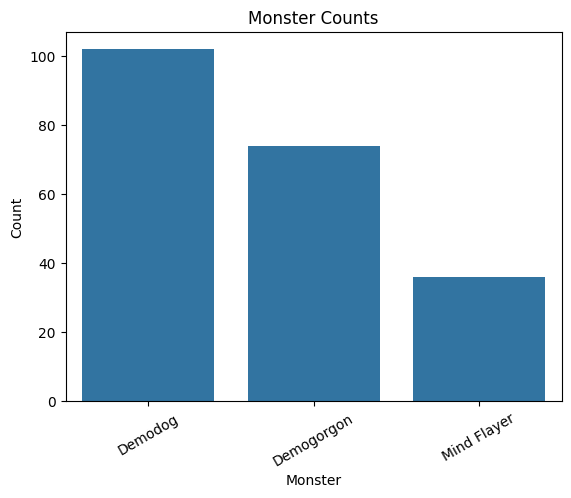

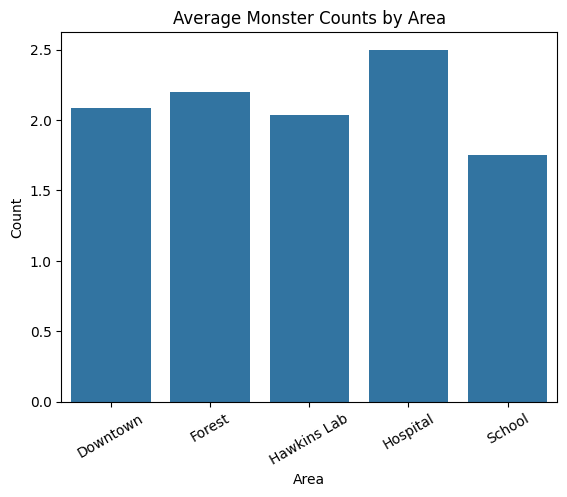

In [19]:
# Histogram of monster counts
vz.plot_bar(monster_df, group_col="Monster", value_col="Count", agg="sum", title="Monster Counts")

# Bar chart of average counts by area
vz.plot_bar(monster_df, group_col="Area", value_col="Count", agg="mean", title="Average Monster Counts by Area")

# 6. Challenge: Experiment Here 🕵️‍♂️

Try the exercises and explore data on your own!


In [16]:
# Filter or use all monster sightings
# Group by 'Day' and sum the 'Count'
# Sort descending to find the peak day



In [17]:
# Group by Character and Location, count occurrences
# Find the location with the highest count per character


In [18]:
# Ensure Severity is mapped to numbers: Low=1, Medium=2, High=3
severity_map = {"Low": 1, "Medium": 2, "High": 3}
events_df["Severity_Num"] = events_df["Severity"].map(severity_map)

# Drop any rows with missing severity
events_df = events_df.dropna(subset=["Severity_Num"])

# Average severity per day
